<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14164 entries, 0 to 14163
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   eventid          14164 non-null  int64         
 1   iyear            14164 non-null  int64         
 2   imonth           14164 non-null  int64         
 3   iday             14164 non-null  int64         
 4   country_txt      14164 non-null  object        
 5   region_txt       14164 non-null  object        
 6   provstate        14164 non-null  object        
 7   city             14164 non-null  object        
 8   attacktype1_txt  14164 non-null  object        
 9   targtype1_txt    14164 non-null  object        
 10  weaptype1_txt    14164 non-null  object        
 11  nkill            14164 non-null  float64       
 12  nwound           14164 non-null  float64       
 13  summary          14164 non-null  object        
 14  casualties       14164 non-null  float

C:\Users\rahul\AppData\Local\Temp\ipykernel_19576\2427987300.py:36: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.set_index('event_date')['eventid'].resample('Y').count().plot()


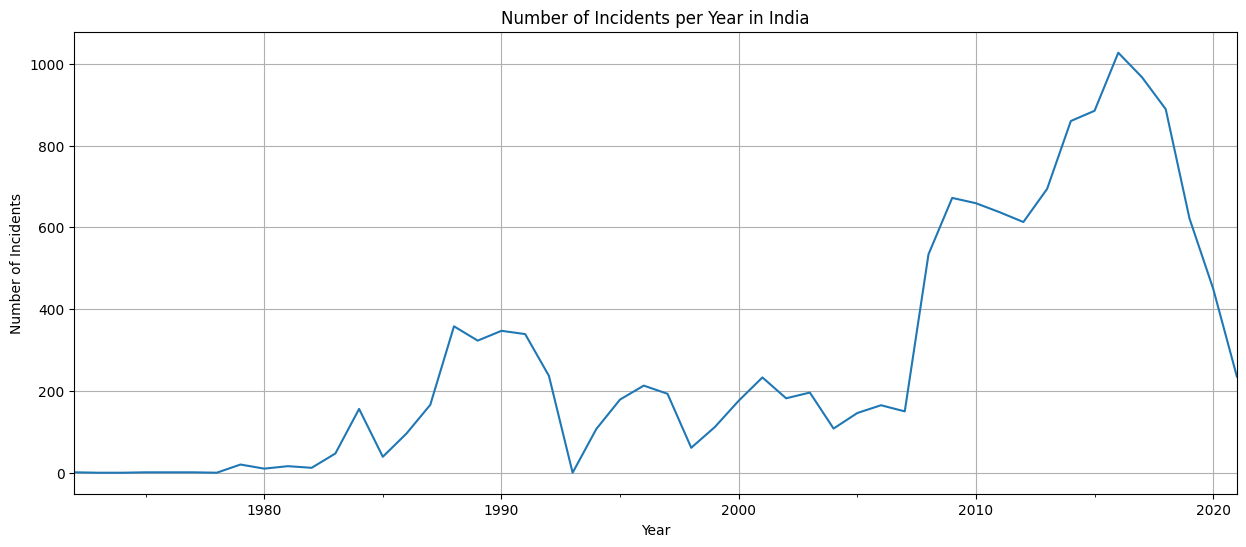

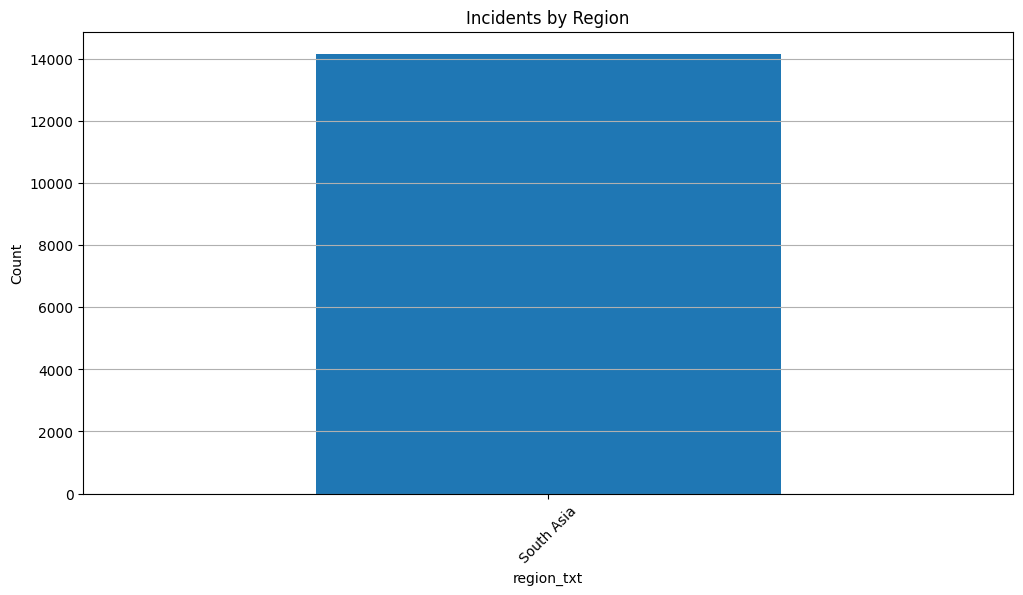

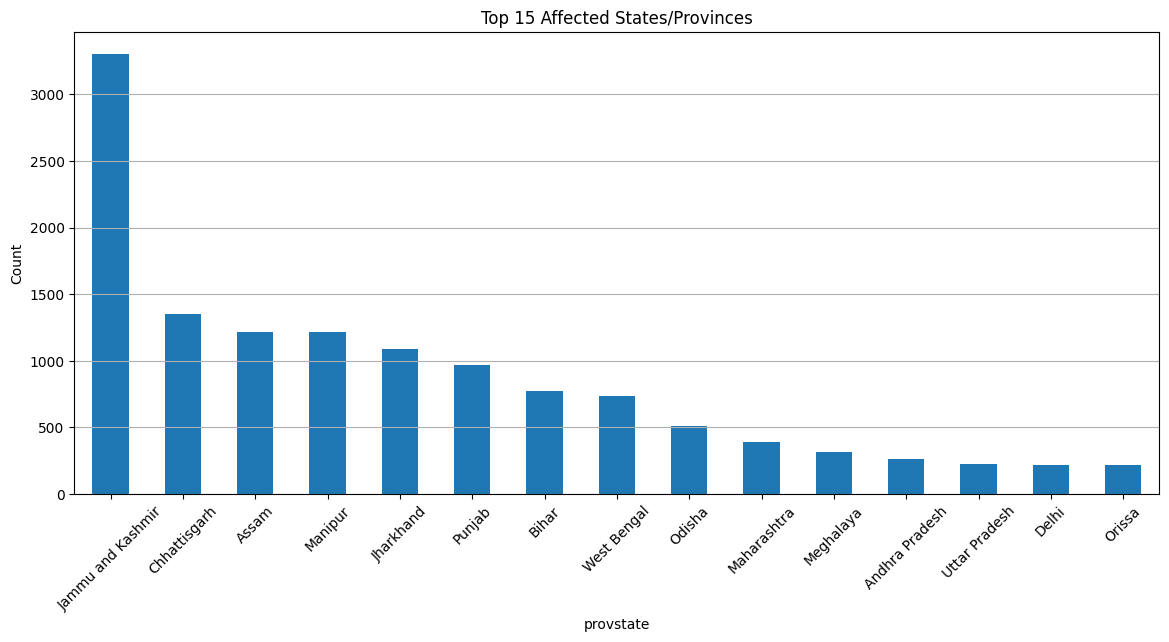

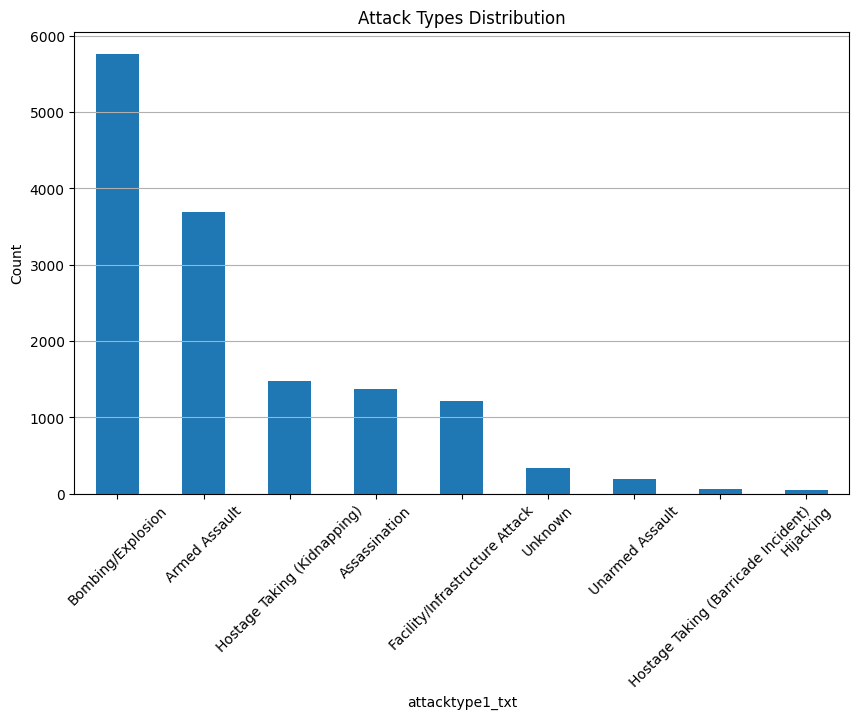

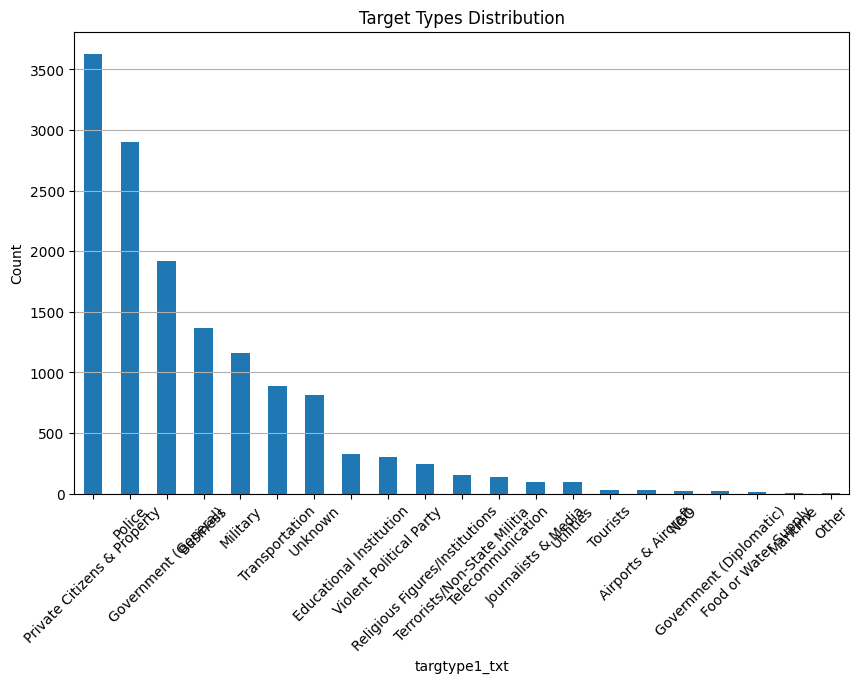

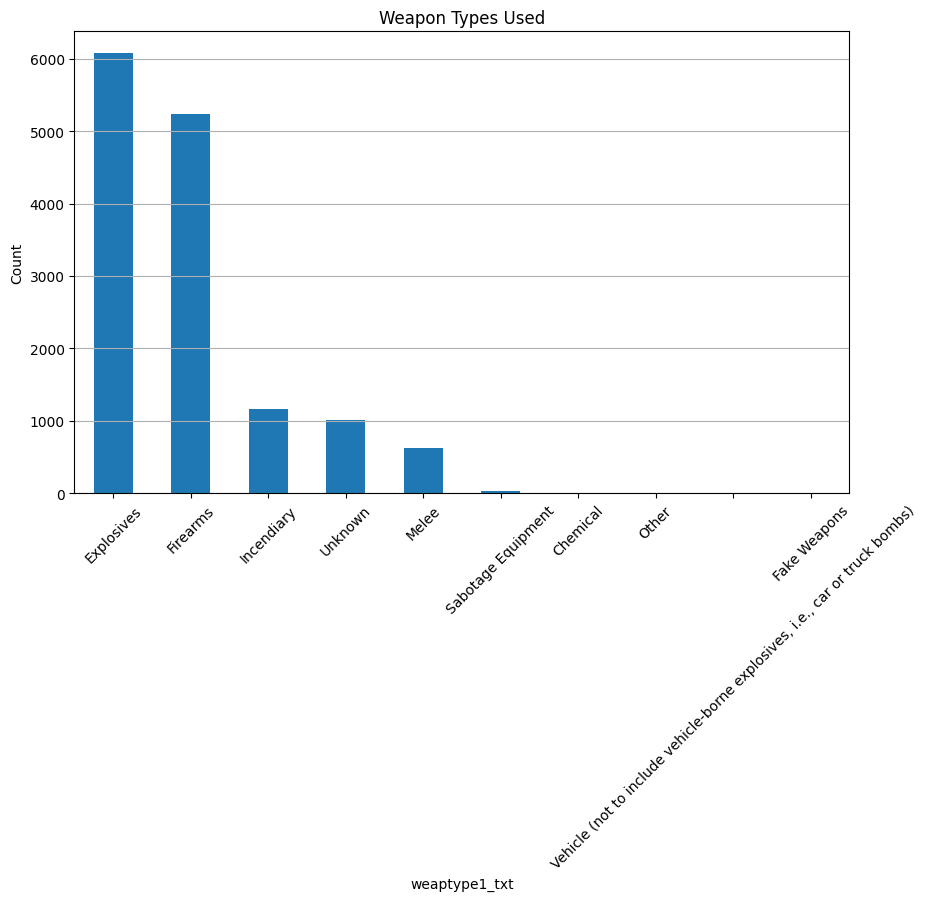

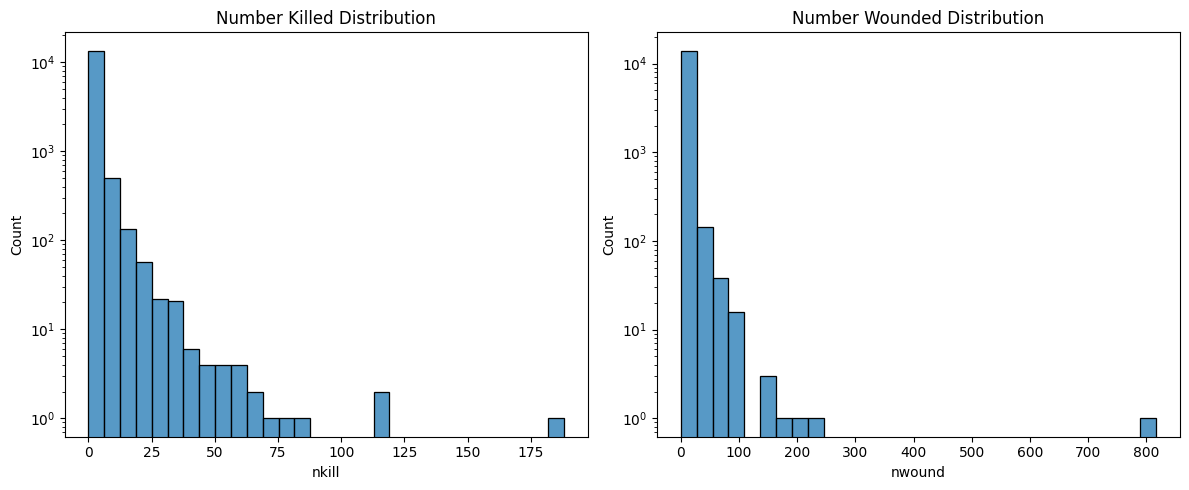

Statistics for nkill > 0:
count    5975.000000
mean        3.429791
std         6.224033
min         1.000000
25%         1.000000
50%         1.000000
75%         3.500000
max       188.000000
Name: nkill, dtype: float64

Statistics for nwound > 0:
count    4348.000000
mean        7.100046
std        17.816096
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       817.000000
Name: nwound, dtype: float64


In [1]:
# %% [markdown]
# # 1. Exploratory Data Analysis (EDA)
# 
# This notebook focuses on:
# 1. Loading the cleaned terrorism dataset.
# 2. Performing descriptive statistics.
# 3. Visualizing data distributions and relationships.
# 4. Identifying patterns, anomalies, and insights relevant to threat forecasting.

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %% [markdown]
# ## Load Cleaned Data

# %%
df = pd.read_csv("C:/Users/rahul/Desktop/Deeplcapstone/data/interim/cleaned_india_terrorism.csv")
df['event_date'] = pd.to_datetime(df[['iyear', 'imonth', 'iday']].fillna(1).astype(int).astype(str).agg('-'.join, axis=1), errors='coerce')
df.info()
df.head()

# %% [markdown]
# ## Descriptive Statistics

# %%
df.describe(include='all')

# %% [markdown]
# ## Temporal Analysis

# %%
plt.figure(figsize=(15, 6))
df.set_index('event_date')['eventid'].resample('Y').count().plot()
plt.title('Number of Incidents per Year in India')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

# %% [markdown]
# ## Regional and State-Level Distribution

# %%
plt.figure(figsize=(12, 6))
df['region_txt'].value_counts().plot(kind='bar')
plt.title('Incidents by Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(14, 6))
df['provstate'].value_counts().nlargest(15).plot(kind='bar')
plt.title('Top 15 Affected States/Provinces')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# %% [markdown]
# ## Attack Types and Targets

# %%
plt.figure(figsize=(10, 6))
df['attacktype1_txt'].value_counts().plot(kind='bar')
plt.title('Attack Types Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
df['targtype1_txt'].value_counts().plot(kind='bar')
plt.title('Target Types Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# %% [markdown]
# ## Weapon Types

# %%
plt.figure(figsize=(10, 6))
df['weaptype1_txt'].value_counts().plot(kind='bar')
plt.title('Weapon Types Used')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# %% [markdown]
# ## Casualties

# %%
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['nkill'], bins=30, kde=False)
plt.title('Number Killed Distribution')
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.histplot(df['nwound'], bins=30, kde=False)
plt.title('Number Wounded Distribution')
plt.yscale('log')

plt.tight_layout()
plt.show()

# %%
print("Statistics for nkill > 0:")
print(df[df['nkill'] > 0]['nkill'].describe())
print("\nStatistics for nwound > 0:")
print(df[df['nwound'] > 0]['nwound'].describe())

# %% [markdown]
# ## Key Insights
# 
# * Significant spikes in terrorism activities are visible in certain years.
# * A few states bear the brunt of the majority of incidents.
# * Explosives and firearms are dominant weapon choices.
# * Civilians and law enforcement are common targets.
# * Casualties show long-tail distribution; most incidents are low-impact but a few are very severe.

# Next: Feature engineering for modeling.
